In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df=pd.read_csv('salary.csv')

In [66]:
df.shape

(15000, 19)

In [67]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [68]:
# these are the colums which are not very usefull for analyizing salray so , simply dropped them
df.drop(columns=['job_id','posting_date','application_deadline','application_deadline','job_description_length','company_name'],inplace=True)

In [69]:
df.head()

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,benefits_score
0,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,5.9
1,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,5.2
2,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,9.4
3,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,8.6
4,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,6.6


In [70]:
df.isnull().sum()

,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0
required_skills,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           15000 non-null  object 
 1   salary_usd          15000 non-null  int64  
 2   salary_currency     15000 non-null  object 
 3   experience_level    15000 non-null  object 
 4   employment_type     15000 non-null  object 
 5   company_location    15000 non-null  object 
 6   company_size        15000 non-null  object 
 7   employee_residence  15000 non-null  object 
 8   remote_ratio        15000 non-null  int64  
 9   required_skills     15000 non-null  object 
 10  education_required  15000 non-null  object 
 11  years_experience    15000 non-null  int64  
 12  industry            15000 non-null  object 
 13  benefits_score      15000 non-null  float64
dtypes: float64(1), int64(3), object(10)
memory usage: 1.6+ MB


<Axes: xlabel='remote_ratio'>

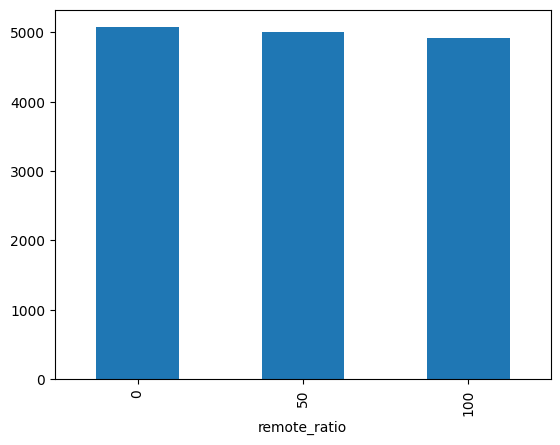

In [72]:
df['remote_ratio'].value_counts().plot(kind='bar')

# 0 mean fully in office , 1 mean partially hyybrid , 2 , means fully remote



In [73]:
df['job_title'].value_counts()

,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771
Head of AI,765
NLP Engineer,762
Robotics Engineer,759
Data Analyst,759


In [74]:
df['experience_level'].value_counts()
# MI stands for mid level , Ex stands for executive , SE stands for senior level , EN stands for entry level

,count
experience_level,
MI,3781
EX,3760
SE,3741
EN,3718


In [75]:
df['employment_type'].value_counts()

# FT stands for full time , Fl stands for freelance , CT stands for Contract , PT stands for part time

,count
employment_type,
FT,3812
FL,3758
CT,3721
PT,3709


In [76]:
df.groupby('employment_type')['salary_usd'].mean()


,salary_usd
employment_type,
CT,115918.919645
FL,114967.645290
FT,116338.137723
PT,114146.881909


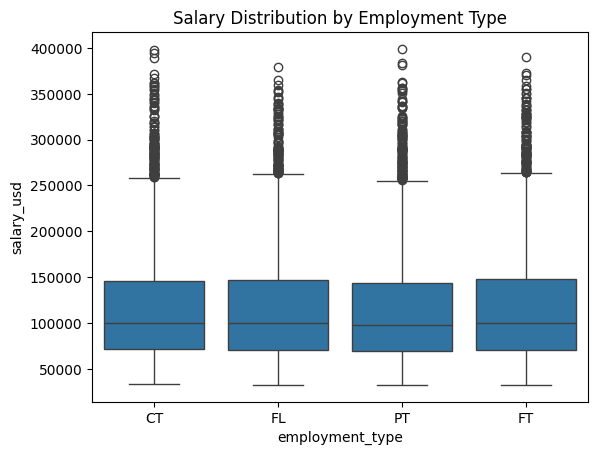

In [77]:

sns.boxplot(x='employment_type', y='salary_usd', data=df)
plt.title("Salary Distribution by Employment Type")
plt.show()

In [78]:
df['company_location'].value_counts()
# since there are lot of countries

,count
company_location,
Germany,814
Denmark,778
Canada,769
France,769
Austria,765
Singapore,764
China,763
India,754
Sweden,752


In [79]:
def country_to_continent(country):
    c = country.lower()

    if c in ['netherlands', 'norway', 'united kingdom', 'finland', 'switzerland',
             'ireland', 'sweden', 'austria', 'france', 'denmark', 'germany']:
        return 'Europe'

    elif c in ['united states', 'canada']:
        return 'North America'

    elif c in ['south korea', 'japan', 'israel', 'india', 'singapore', 'china']:
        return 'Asia'

    elif c in ['australia']:
        return 'Australia'

    else:
        return 'Other'


In [80]:
df['company_location'] = df['company_location'].apply(country_to_continent)


In [81]:
df['company_location'].value_counts()

,count
company_location,
Europe,8288
Asia,4487
North America,1493
Australia,732


In [82]:
df['company_size'].value_counts()


,count
company_size,
S,5007
L,4998
M,4995


In [83]:
df.groupby('company_size')['salary_usd'].mean()
# linear relationship as the compay size grows so salary grows.


,salary_usd
company_size,
L,130322.451781
M,113600.237037
S,102146.930098


In [84]:
df['employee_residence'].value_counts()

,count
employee_residence,
Sweden,790
France,781
Denmark,777
Austria,776
India,772
Germany,769
South Korea,763
Canada,762
China,761


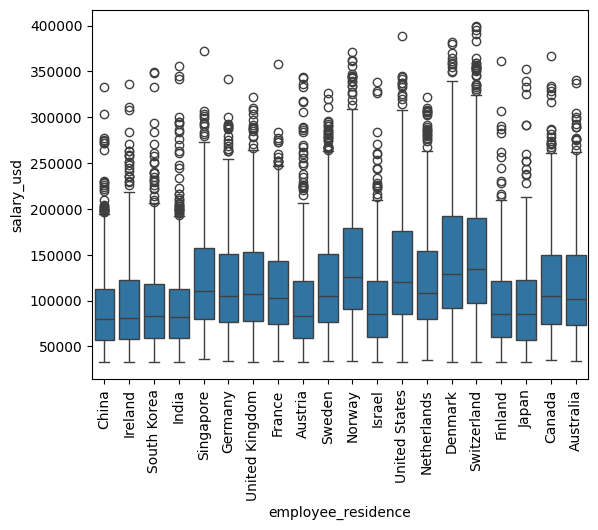

In [85]:

sns.boxplot(x='employee_residence', y='salary_usd', data=df)
plt.xticks(rotation=90)  # <- rotate x-axis labels
plt.show()

In [86]:
df['employee_residence']=df['employee_residence'].apply(country_to_continent)

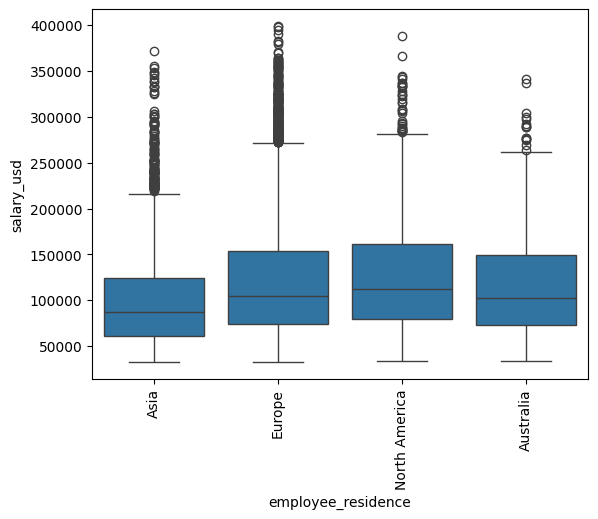

In [87]:

sns.boxplot(x='employee_residence', y='salary_usd', data=df)
plt.xticks(rotation=90)  # <- rotate x-axis labels
plt.show()

In [88]:
df.corr(numeric_only=True)['salary_usd']

,salary_usd
salary_usd,1.000000
remote_ratio,0.013727
years_experience,0.737556
benefits_score,0.000985


In [89]:
# dropping remote_ratio col beacuse it is not  affecting salary much  and also benefits_score col as well...

df.drop(columns=['remote_ratio','benefits_score'],inplace=True)

In [90]:
df['required_skills'].value_counts()


,count
required_skills,
"Python, TensorFlow, PyTorch",17
"Python, TensorFlow, Tableau",9
"Python, TensorFlow, Linux",7
"Python, TensorFlow, Data Visualization",7
"Python, TensorFlow, MLOps",7
...,...
"Data Visualization, Hadoop, GCP, TensorFlow, R",1
"Mathematics, Git, Spark",1
"TensorFlow, SQL, NLP, Python, Scala",1


In [91]:
skills_series = df['required_skills'].dropna()

# Step 2: Split by comma and flatten
all_skills = skills_series.str.split(',').explode().str.strip()

# Step 3: Count each unique skill
skill_counts = all_skills.value_counts()

# Step 4 (Optional): Display top 10 skills
print(skill_counts.head(10))

required_skills
Python        4450
SQL           3407
TensorFlow    3022
Kubernetes    3009
Scala         2794
PyTorch       2777
Linux         2705
Git           2631
Java          2578
GCP           2442
Name: count, dtype: int64


<ipython-input-92-412373826>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='Blues_d')


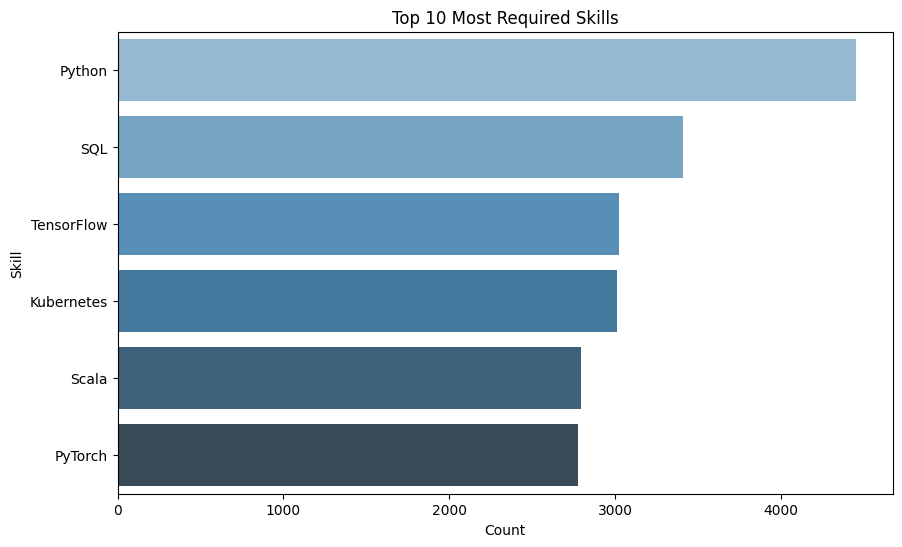

In [92]:
# Plot top 10 most common skills
top_skills = skill_counts.head(6)

plt.figure(figsize=(10,6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='Blues_d')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 10 Most Required Skills')
plt.show()

In [93]:
# Step 1: Explode and strip each skill
skill_dummies = (
    df['required_skills']
    .dropna()
    .str.split(',')
    .apply(lambda x: [i.strip() for i in x])  # remove spaces
    .explode()
    .reset_index(name='skill')  # name the exploded column properly
)

# Step 2: Create a dummy column
skill_dummies['value'] = 1

# Step 3: Pivot to wide format (skills as columns)
skill_dummies = skill_dummies.pivot_table(index='index', columns='skill', values='value', fill_value=0)

# Step 4: Join back to the original DataFrame
df = df.join(skill_dummies, how='left')


In [94]:
df.head()

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,required_skills,education_required,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
0,AI Research Scientist,90376,USD,SE,CT,Asia,M,Asia,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,AI Software Engineer,61895,USD,EN,CT,North America,M,Europe,"Deep Learning, AWS, Mathematics, Python, Docker",Master,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AI Specialist,152626,USD,MI,FL,Europe,L,Asia,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NLP Engineer,80215,USD,SE,FL,Asia,M,Asia,"Scala, SQL, Linux, Python",PhD,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,AI Consultant,54624,EUR,EN,PT,Europe,S,Asia,"MLOps, Java, Tableau, Python",Master,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
df.drop(columns=['required_skills'],inplace=True)

In [96]:
df['education_required'].value_counts()

,count
education_required,
Bachelor,3789
Associate,3785
Master,3748
PhD,3678


In [97]:
df.groupby('education_required')['salary_usd'].mean()


,salary_usd
education_required,
Associate,114605.708058
Bachelor,115861.629190
Master,117171.815902
PhD,113728.165579


In [98]:
df['years_experience'].value_counts()

,count
years_experience,
0,1890
1,1828
4,1295
3,1247
2,1239
7,769
5,757
6,753
9,742


<Axes: xlabel='years_experience', ylabel='salary_usd'>

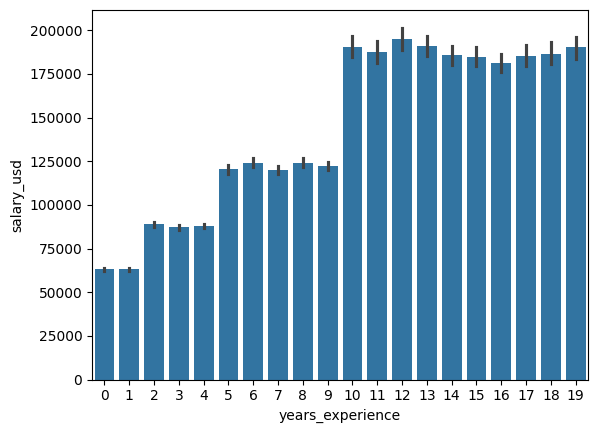

In [99]:
sns.barplot(x=df['years_experience'],y=df['salary_usd'])

In [100]:
df['industry'].value_counts()

,count
industry,
Retail,1063
Media,1045
Automotive,1020
Consulting,1020
Technology,1011
Real Estate,1007
Government,998
Transportation,997
Telecommunications,997


<ipython-input-101-531569390>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary_usd'])


<Axes: xlabel='salary_usd', ylabel='Density'>

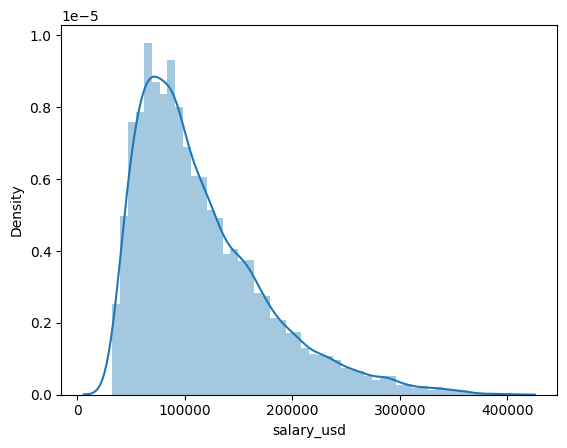

In [101]:
sns.distplot(df['salary_usd'])
# since we can it is an right skwerd transformation so for making it normal applying log transformation


In [102]:
df['salary_usd']=np.log(df['salary_usd'])

<ipython-input-103-1419092774>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary_usd'])


<Axes: xlabel='salary_usd', ylabel='Density'>

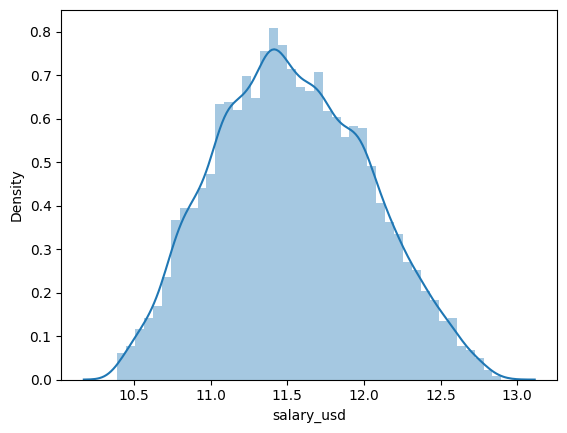

In [103]:
sns.distplot(df['salary_usd'])

In [104]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Split features and target
X = df.drop(columns=['salary_usd'])
y = df['salary_usd']

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Identify categorical and numerical columns
categorical_cols = ['job_title', 'salary_currency', 'experience_level',
                    'company_location', 'company_size',
                    'employee_residence', 'education_required', 'industry']

# Automatically detect numeric columns (excluding categorical ones)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_cols).tolist()

# Step 4: Create a column transformer with encoders and scalers
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Step 5: Fit on training data and transform both train and test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [125]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

input_dim=X_train_processed.shape[1]
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=input_dim))
model.add(BatchNormalization())



model.add(Dense(128,activation='relu'))

model.add(BatchNormalization())

model.add(Dense(62,activation='relu'))
model.add(BatchNormalization())


model.add(Dense(1,activation='linear'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 62)             │         7,998 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 62)             │           248 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,469 (142.46 KB)

 Trainable params: 35,833 (139.97 KB)

 Non-trainable params: 636 (2.48 KB)

In [127]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])


from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    min_delta=0.00001,
    verbose=1,
    mode='auto',
    baseline=None
)

model.fit(X_train_processed,y_train,epochs=100,validation_split=0.2,callbacks=callback)



Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 103.9640 - mae: 9.9574 - val_loss: 4.8159 - val_mae: 1.9999
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0353 - mae: 1.1386 - val_loss: 0.4883 - val_mae: 0.5554
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4220 - mae: 0.5136 - val_loss: 0.2999 - val_mae: 0.4367
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2594 - mae: 0.4049 - val_loss: 0.2162 - val_mae: 0.3685
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1921 - mae: 0.3490 - val_loss: 0.1738 - val_mae: 0.3294
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1499 - mae: 0.3076 - val_loss: 0.1463 - val_mae: 0.3071
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1290 - mae: 0.2851 - val_loss: 0.1407 - val_mae: 0.2969
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1143 - mae: 0.2703 - val_loss: 0.1147 - val_mae: 0.2698
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

In [128]:
test_loss, test_mae = model.evaluate(X_test_processed, y_test)
print(f"Test MAE: {test_mae:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829 - mae: 0.2298
Test MAE: 0.2263


In [129]:
y_pred = model.predict(X_test_processed)


results = pd.DataFrame({
    'Actual': np.exp(y_test),              # convert back to original salary
    'Predicted': np.exp(y_pred.flatten())  # same here
})

print(results.head(10))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
         Actual      Predicted
11499  138919.0  121778.843750
6475   187208.0  159531.500000
13167  158264.0   84116.351562
862    139174.0  111772.390625
5970    61622.0   79716.507812
6706    90518.0  111340.140625
3017    84245.0   82663.679688
3781    51038.0   31568.611328
3898   105093.0  146819.218750
2250    54155.0   84002.601562
